In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import pingouin as pg
from scipy import stats
from pingouin import anova
from statsmodels.formula.api import ols
from statsmodels.graphics.factorplots import interaction_plot
from bioinfokit.analys import stat 
from statsmodels.stats.power import TTestIndPower
from scipy.stats import ttest_ind
from plotly.offline import download_plotlyjs, init_notebook_mode, iplot
from plotly.graph_objs import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
# missing data=> impossible for live human begin have 0 Glucose, BloodPressure, SkinThickness, Insulin, BMI
# replace 0s with mean

df['Glucose'] = df['Glucose'].replace(0, df['Glucose'].mean())
df['BloodPressure'] = df['BloodPressure'].replace(0, df['BloodPressure'].median())
df['SkinThickness'] = df['SkinThickness'].replace(0, df['SkinThickness'].median())
df['Insulin'] = df['Insulin'].replace(0, df['Insulin'].median())
df['BMI'] = df['BMI'].replace(0, df['BMI'].median())

In [7]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.386719,27.334635,94.652344,32.450911,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.096642,9.229014,105.547598,6.875366,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,23.000000,30.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,31.250000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

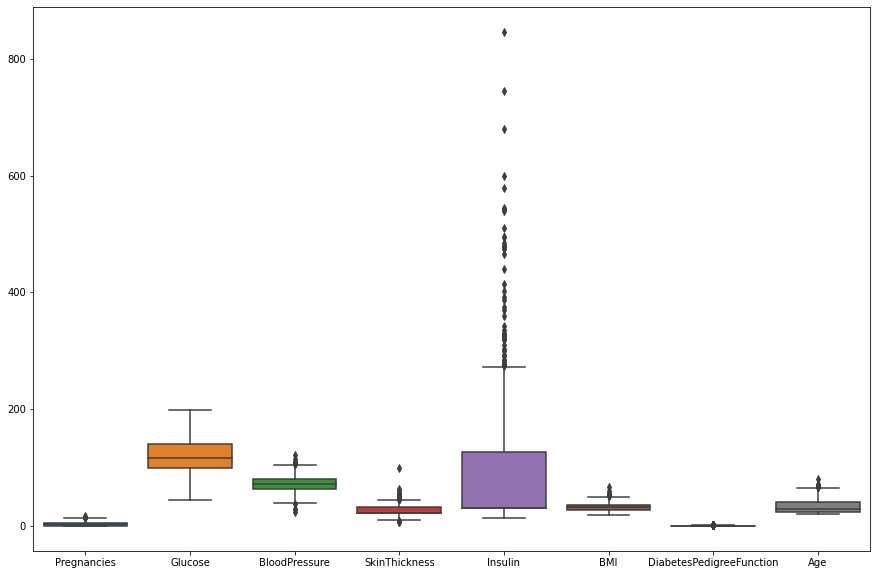

In [8]:
# use boxplot to identify outliers- overall

fig , ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data=df.iloc[:, :8], ax = ax)

<AxesSubplot:>

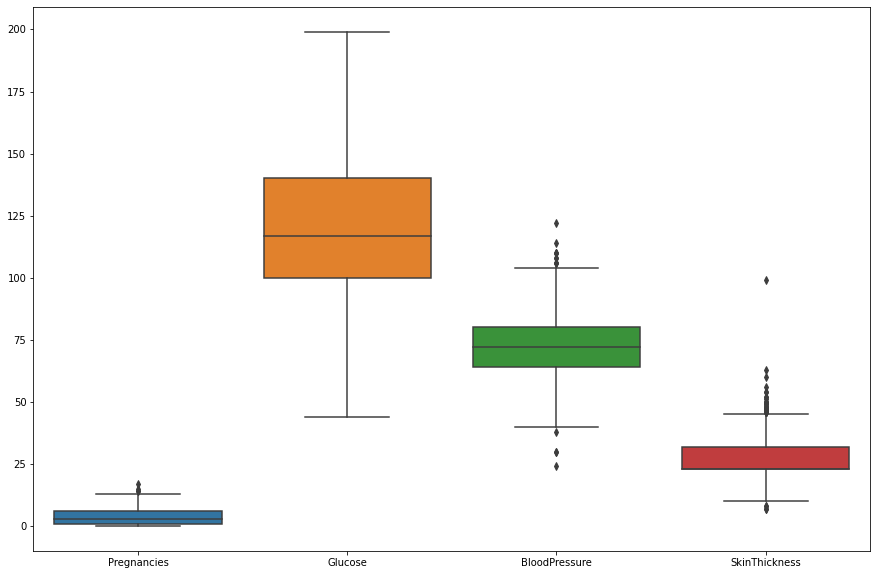

In [9]:
# use boxplot to identify outliers- Pregnancies,Glucose,BloodPressure,SkinThickness

fig , ax = plt.subplots(figsize = (15, 10))
sns.boxplot(data=df.iloc[:, :4], ax = ax)

<AxesSubplot:ylabel='Insulin'>

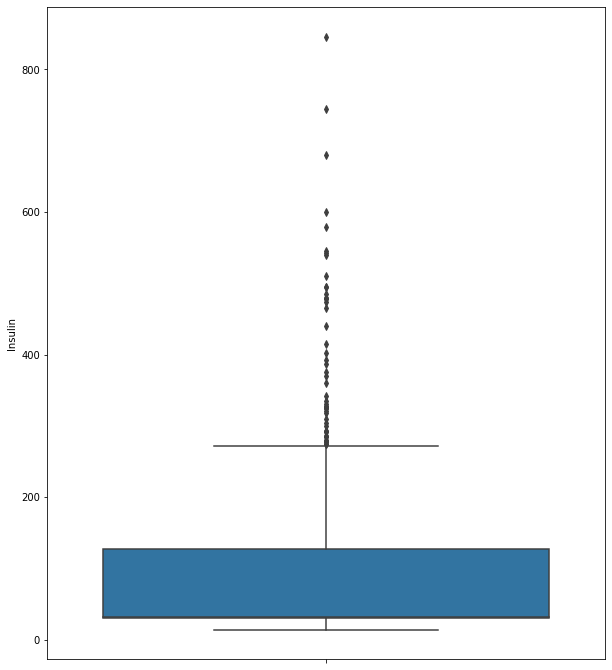

In [10]:
# outlier finding process- insulin
fig , ax = plt.subplots(figsize = (10, 12))
sns.boxplot(y = df['Insulin'], data=df, ax = ax)

<AxesSubplot:ylabel='BMI'>

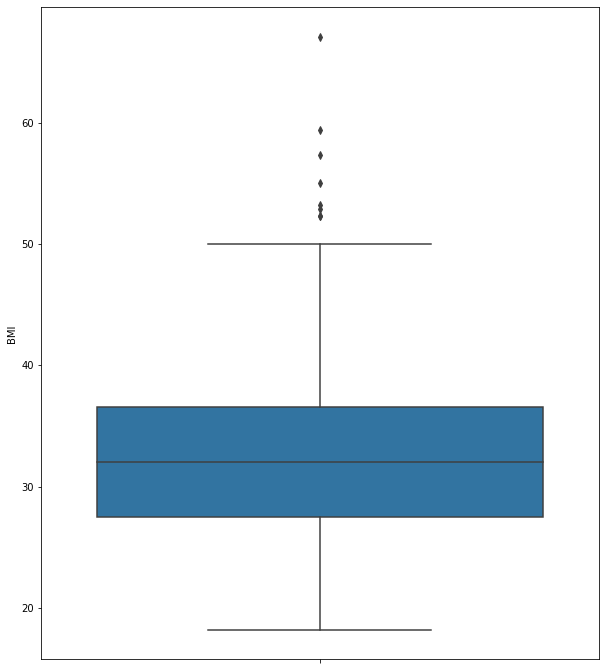

In [11]:
# outlier finding process- BMI, 
fig , ax = plt.subplots(figsize = (10, 12))
sns.boxplot(y = df['BMI'], data=df, ax = ax)

<AxesSubplot:ylabel='DiabetesPedigreeFunction'>

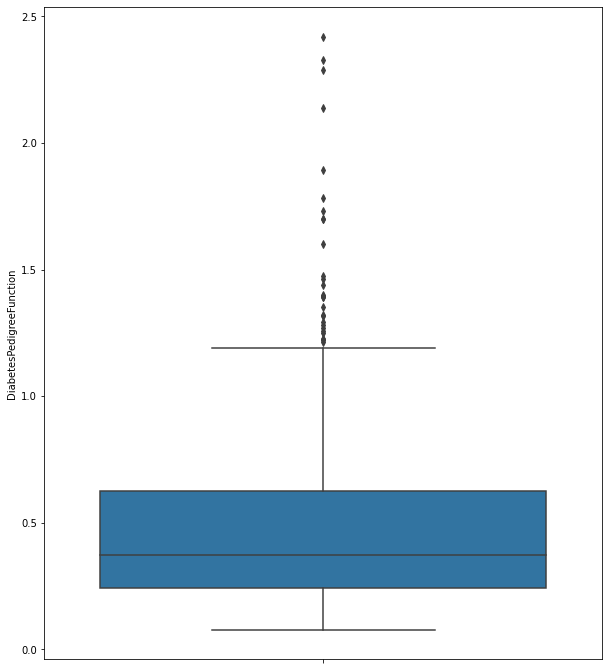

In [12]:
# outlier finding process- DiabetesPedigreeFunction
fig , ax = plt.subplots(figsize = (10, 12))
sns.boxplot(y = df['DiabetesPedigreeFunction'], data=df,ax = ax)




In [13]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72,35,30.5,33.6,0.627,50,1
1,1,85.0,66,29,30.5,26.6,0.351,31,0
2,8,183.0,64,23,30.5,23.3,0.672,32,1
3,1,89.0,66,23,94.0,28.1,0.167,21,0
4,0,137.0,40,35,168.0,43.1,2.288,33,1


In [14]:
# copy df to df2 to record new categorical information
df2 = df.copy()

# categorize variables and replace 0s with median- glucose, blood pressure, skin thickness,insulin, BMI

df2['Glucose'] = pd.cut(x = df['Glucose'], bins = [0,140, 199, 250], labels = ['Normal', 'Intermediate', 'High'])
df2['BloodPressure'] = pd.cut(x = df['BloodPressure'], bins = [0,79, 89, 119, 250], labels = ['Normal', 'Stage1', 'Stage2', 'Hypertension'])
df2['Insulin'] = pd.cut(x = df['Insulin'], bins = [0,199, 600, 999], labels = ['Deficiency', 'Intermediate', 'Substantial'])
df2['BMI'] = pd.cut(x = df['BMI'], bins = [0,18.49, 24.9, 29.9, 50], labels = ['Underweight', 'Normal', 'Overweight', 'Obese'])
df2['Age'] = pd.cut(x = df['Age'], bins = [0,24, 64, 150], labels = ['Youth', 'Adulthood', 'Seniority'])


In [15]:
df2.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,Intermediate,Normal,35,Deficiency,Obese,0.627,Adulthood,1
1,1,Normal,Normal,29,Deficiency,Overweight,0.351,Adulthood,0
2,8,Intermediate,Normal,23,Deficiency,Normal,0.672,Adulthood,1
3,1,Normal,Normal,23,Deficiency,Overweight,0.167,Youth,0
4,0,Normal,Normal,35,Deficiency,Obese,2.288,Adulthood,1


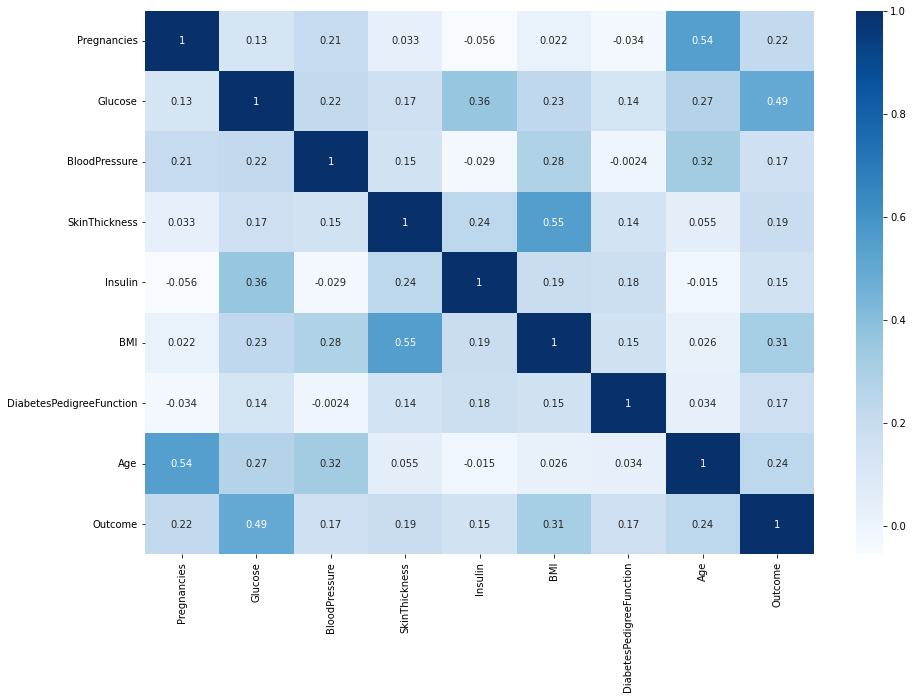

In [16]:
# heatmap to see high level correlation among variables
corr = df.corr()
plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='Blues')
plt.show()

In [17]:
# t-test

a = df.loc[:, 'Pregnancies']
b = df.loc[:, 'Glucose']
c = df.loc[:, 'BloodPressure']
d = df.loc[:, 'SkinThickness']
e = df.loc[:, 'Insulin']
f = df.loc[:, 'BMI']
g = df.loc[:, 'DiabetesPedigreeFunction']
h = df.loc[:, 'Age']
i = df.loc[:, 'Outcome']

#pregnancies vs outcome
tStat, pValue = stats.ttest_ind(a, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))


P-Value:1.4014220575049232e-123, T-Statistic:28.469546173883934


In [18]:
#glucose vs outcome
tStat, pValue = stats.ttest_ind(b, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0, T-Statistic:110.46308413206346


In [19]:
#Blood pressure vs outcome
tStat, pValue = stats.ttest_ind(c, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0, T-Statistic:164.90684366822575


In [20]:
#skinthickness vs outcome
tStat, pValue = stats.ttest_ind(d, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0, T-Statistic:80.92438947250223


In [21]:
#Insulin vs outcome
tStat, pValue = stats.ttest_ind(e, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:6.321715287018709e-100, T-Statistic:24.760254466607947


In [22]:
#BMI vs outcome
tStat, pValue = stats.ttest_ind(f, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0, T-Statistic:129.08439212992056


In [23]:
#diabetesPedigreeFunction vs outcome
tStat, pValue = stats.ttest_ind(g, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:5.6048470155751356e-09, T-Statistic:5.865604271120938


In [24]:
#Age vs outcome
tStat, pValue = stats.ttest_ind(h, i, equal_var = False)
print ("P-Value:{0}, T-Statistic:{1}".format(pValue, tStat))

P-Value:0.0, T-Statistic:77.44567748756118


In [25]:
# -- one way anova startx

In [26]:
# 1 way anova (1) Glucose vs. Outcome, (2) Insulins vs. Outcome, (3) BMI vs Outcome, (4) BloodPressure vs Outcome, 
# (5) Age vs Outcome

In [27]:
# Glucose vs Outcome

mod = ols('Outcome ~ Glucose', data=df2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df           F        PR(>F)
Glucose    58.680556    2.0  154.849282  1.657572e-32
Residual  145.138889  766.0         NaN           NaN


In [28]:
# post-hoc Bonferroni
pair_t = mod.t_test_pairwise('Glucose')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Intermediate-Normal,0.451389,0.036274,12.443845,1.657572e-32,0.380181,0.522597,4.972716e-32,True
High-Normal,0.000000,0.000000,0.000000,1.000000e+00,0.000000,0.000000,1.000000e+00,False
High-Intermediate,-0.451389,0.036274,-12.443845,1.657572e-32,-0.522597,-0.380181,4.972716e-32,True


In [29]:
# post-hoc pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='Glucose', effsize = 'cohen', data=df2)
print(pt)

        A             B   mean(A)  mean(B)      diff        se          T  \
0  Normal  Intermediate  0.236111   0.6875 -0.451389  0.036274 -12.443845   

   p-tukey     cohen  
0      0.0 -1.036987  


In [30]:
# Insulin vs Outcome

mod = ols('Outcome ~ Insulin', data=df2).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df         F    PR(>F)
Insulin     3.347932    2.0  7.483052  0.000605
Residual  171.131235  765.0       NaN       NaN


In [31]:
# post-hoc Bonferroni
pair_t = mod.t_test_pairwise('Insulin')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Intermediate-Deficiency,0.209405,0.054135,3.868180,0.000119,0.103134,0.315676,0.000357,True
Substantial-Deficiency,0.007855,0.273672,0.028701,0.977110,-0.529383,0.545092,0.977110,False
Substantial-Intermediate,-0.201550,0.277792,-0.725545,0.468339,-0.746875,0.343774,0.717337,False


In [32]:
# post-hoc pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='Insulin', effsize = 'cohen', data=df2)
print(pt)

              A             B   mean(A)   mean(B)      diff        se  \
0    Deficiency  Intermediate  0.325479  0.534884 -0.209405  0.054135   
1    Deficiency   Substantial  0.325479  0.333333 -0.007855  0.273672   
2  Intermediate   Substantial  0.534884  0.333333  0.201550  0.277792   

          T   p-tukey     cohen  
0 -3.868180  0.000350 -0.442745  
1 -0.028701  0.999546 -0.016607  
2  0.725545  0.748415  0.426137  


In [33]:
# BMI vs. Outcome
mod = ols('Outcome ~ BMI', data=df2).fit()                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df          F        PR(>F)
BMI        16.413676    3.0  26.639869  2.189026e-16
Residual  155.265271  756.0        NaN           NaN


In [34]:
# post-hoc Bonferroni
pair_t = mod.t_test_pairwise('BMI')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Normal-Underweight,0.068627,0.230993,0.297097,7.664738e-01,-0.384837,0.522092,7.664738e-01,False
Overweight-Underweight,0.223464,0.229111,0.975353,3.296974e-01,-0.226305,0.673232,5.506944e-01,False
Obese-Underweight,0.452632,0.227545,1.989196,4.703952e-02,0.005937,0.899327,1.345845e-01,False
Overweight-Normal,0.154836,0.056222,2.754037,6.027912e-03,0.044467,0.265205,2.389451e-02,True
Obese-Normal,0.384004,0.049456,7.764592,2.664898e-14,0.286917,0.481091,1.598939e-13,True
Obese-Overweight,0.229168,0.039746,5.765832,1.183880e-08,0.151143,0.307193,5.919399e-08,True


In [35]:
# post-hoc pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='BMI', effsize = 'cohen', data=df2)
print(pt)

             A           B   mean(A)   mean(B)      diff        se         T  \
0  Underweight      Normal  0.000000  0.068627 -0.068627  0.230993 -0.297097   
1  Underweight  Overweight  0.000000  0.223464 -0.223464  0.229111 -0.975353   
2  Underweight       Obese  0.000000  0.452632 -0.452632  0.227545 -1.989196   
3       Normal  Overweight  0.068627  0.223464 -0.154836  0.056222 -2.754037   
4       Normal       Obese  0.068627  0.452632 -0.384004  0.049456 -7.764592   
5   Overweight       Obese  0.223464  0.452632 -0.229168  0.039746 -5.765832   

        p-tukey     cohen  
0  9.908788e-01 -0.151433  
1  7.635528e-01 -0.493095  
2  1.929205e-01 -0.998777  
3  3.062633e-02 -0.341662  
4  3.410605e-13 -0.847344  
5  7.090954e-08 -0.505682  


In [36]:
# BloodPressure vs Outcome
mod = ols('Outcome ~ BloodPressure', data=df2).fit()                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

                   sum_sq     df       F    PR(>F)
BloodPressure    2.672560    3.0  3.9615  0.008098
Residual       171.806607  764.0     NaN       NaN


In [37]:
# post-hoc Bonferroni
pair_t = mod.t_test_pairwise('BloodPressure')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Stage1-Normal,0.104526,0.044162,2.366866,0.018188,0.017832,0.191220,0.087691,False
Stage2-Normal,0.175362,0.064892,2.702385,0.007037,0.047975,0.302749,0.041487,True
Hypertension-Normal,-0.316163,0.474634,-0.666121,0.505535,-1.247905,0.615578,0.765817,False
Stage2-Stage1,0.070836,0.073228,0.967329,0.333686,-0.072917,0.214588,0.765817,False
Hypertension-Stage1,-0.420690,0.475845,-0.884089,0.376926,-1.354809,0.513430,0.765817,False
Hypertension-Stage2,-0.491525,0.478215,-1.027834,0.304353,-1.430296,0.447245,0.765817,False


In [38]:
# post-hoc pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='BloodPressure', effsize = 'cohen', data=df2)
print(pt)

        A             B   mean(A)   mean(B)      diff        se         T  \
0  Normal        Stage1  0.316163  0.420690 -0.104526  0.044162 -2.366866   
1  Normal        Stage2  0.316163  0.491525 -0.175362  0.064892 -2.702385   
2  Normal  Hypertension  0.316163  0.000000  0.316163  0.474634  0.666121   
3  Stage1        Stage2  0.420690  0.491525 -0.070836  0.073228 -0.967329   
4  Stage1  Hypertension  0.420690  0.000000  0.420690  0.475845  0.884089   
5  Stage2  Hypertension  0.491525  0.000000  0.491525  0.478215  1.027834   

    p-tukey     cohen  
0  0.084428 -0.220421  
1  0.035391 -0.369796  
2  0.909809  0.666712  
3  0.768087 -0.149375  
4  0.813139  0.887133  
5  0.733167  1.036508  


In [39]:
# Age vs Outcome
mod = ols('Outcome ~ Age', data=df2).fit()                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

              sum_sq     df         F        PR(>F)
Age        13.722829    2.0  32.65179  2.468202e-14
Residual  160.756337  765.0       NaN           NaN


In [40]:
# post-hoc Bonferroni
pair_t = mod.t_test_pairwise('Age')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Adulthood-Youth,0.295596,0.036794,8.033809,3.571037e-15,0.223367,0.367825,1.071311e-14,True
Seniority-Youth,0.108447,0.118715,0.913512,3.612611e-01,-0.124598,0.341493,3.612611e-01,False
Seniority-Adulthood,-0.187148,0.116310,-1.609051,1.080178e-01,-0.415472,0.041176,2.043677e-01,False


In [41]:
# post-hoc pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='Age', effsize = 'cohen', data=df2)
print(pt)

           A          B   mean(A)   mean(B)      diff        se         T  \
0      Youth  Adulthood  0.141553  0.437148 -0.295596  0.036794 -8.033809   
1      Youth  Seniority  0.141553  0.250000 -0.108447  0.118715 -0.913512   
2  Adulthood  Seniority  0.437148  0.250000  0.187148  0.116310  1.609051   

    p-tukey     cohen  
0  0.000000 -0.644829  
1  0.631911 -0.236574  
2  0.242382  0.408256  


In [42]:
# -- one way anova end

In [43]:
# -- two way anova start

In [44]:
# 2 way anova: (1) Glucose vs. blood pressure, (2) Glucose vs. Insulin, (3) Glucose vs. BMI, (4) BloodPressure vs. Insulin, 
# (5) BloodPressure vs BMI, (6) Insulin vs BMI, (7) GLucose vs. Age, (8) BloodPressure vs Age, (9) Insulin vs Age, (10) BMI vs Age

model1 = ols('Outcome ~ C(Glucose) + C(BloodPressure) + C(Glucose):C(BloodPressure)', data=df2).fit()
anova_table1 = sm.stats.anova_lm(model1)
anova_table1

,df,sum_sq,mean_sq,F,PR(>F)
C(Glucose),2.0,29.422677,14.711338,78.211341,1.285812e-31
C(BloodPressure),3.0,0.901285,0.300428,1.597197,1.886576e-01
C(Glucose):C(BloodPressure),6.0,1.848148,0.308025,1.637582,1.338590e-01
Residual,761.0,143.142009,0.188097,NaN,NaN


In [45]:
#post hoc test for main effect Glucose
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Glucose', anova_model='Outcome ~ C(Glucose) + C(BloodPressure) + C(Glucose):C(BloodPressure)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

         group1  group2      Diff     Lower     Upper    q-value  p-value
0  Intermediate  Normal  0.456657  0.385631  0.527684  17.849722    0.001


In [46]:
#post hoc test for main effect BloodPressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BloodPressure', anova_model='Outcome ~ C(Glucose) + C(BloodPressure) + C(Glucose):C(BloodPressure)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

   group1  group2      Diff     Lower     Upper   q-value   p-value
0  Normal  Stage2  0.179639  0.022762  0.336516  4.169678  0.017315
1  Normal  Stage1  0.109420  0.005963  0.212876  3.851211  0.033416


In [47]:
#Bonferroni

mod = ols('Outcome ~ BloodPressure', data=df2).fit()

pair_t = mod.t_test_pairwise('BloodPressure')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Stage1-Normal,0.104526,0.044162,2.366866,0.018188,0.017832,0.191220,0.087691,False
Stage2-Normal,0.175362,0.064892,2.702385,0.007037,0.047975,0.302749,0.041487,True
Hypertension-Normal,-0.316163,0.474634,-0.666121,0.505535,-1.247905,0.615578,0.765817,False
Stage2-Stage1,0.070836,0.073228,0.967329,0.333686,-0.072917,0.214588,0.765817,False
Hypertension-Stage1,-0.420690,0.475845,-0.884089,0.376926,-1.354809,0.513430,0.765817,False
Hypertension-Stage2,-0.491525,0.478215,-1.027834,0.304353,-1.430296,0.447245,0.765817,False


In [48]:
#pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='BloodPressure', effsize = 'cohen', data=df2)
print(pt)

        A             B   mean(A)   mean(B)      diff        se         T  \
0  Normal        Stage1  0.316163  0.420690 -0.104526  0.044162 -2.366866   
1  Normal        Stage2  0.316163  0.491525 -0.175362  0.064892 -2.702385   
2  Normal  Hypertension  0.316163  0.000000  0.316163  0.474634  0.666121   
3  Stage1        Stage2  0.420690  0.491525 -0.070836  0.073228 -0.967329   
4  Stage1  Hypertension  0.420690  0.000000  0.420690  0.475845  0.884089   
5  Stage2  Hypertension  0.491525  0.000000  0.491525  0.478215  1.027834   

    p-tukey     cohen  
0  0.084428 -0.220421  
1  0.035391 -0.369796  
2  0.909809  0.666712  
3  0.768087 -0.149375  
4  0.813139  0.887133  
5  0.733167  1.036508  


In [49]:
#post hoc test for main effect Glucose and BloodPressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['Glucose', 'BloodPressure'], anova_model='Outcome ~ C(Glucose) + C(BloodPressure) + C(Glucose):C(BloodPressure)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
                    group1            group2      Diff     Lower     Upper  \
3   (Intermediate, Normal)  (Normal, Normal)  0.488735  0.354154  0.623317   
4   (Intermediate, Normal)  (Normal, Stage2)  0.421488  0.164141  0.678835   
5   (Intermediate, Normal)  (Normal, Stage1)  0.360882  0.183295  0.538468   
9   (Intermediate, Stage2)  (Normal, Normal)  0.612702  0.326391  0.899014   
10  (Intermediate, Stage2)  (Normal, Stage2)  0.545455  0.184775  0.906134   
11  (Intermediate, Stage2)  (Normal, Stage1)  0.484848  0.175981  0.793716   
14  (Intermediate, Stage1)  (Normal, Normal)  0.403216  0.200114  0.606319   
15  (Intermediate, Stage1)  (Normal, Stage2)  0.335968  0.037027  0.634910  

In [50]:
model2 = ols('Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)', data=df2).fit()
anova_table2 = sm.stats.anova_lm(model2)
anova_table2

,df,sum_sq,mean_sq,F,PR(>F)
C(Glucose),2.0,29.422677,14.711338,77.637516,2.037028e-31
C(Insulin),2.0,0.539706,0.269853,1.424121,2.413592e-01
C(Glucose):C(Insulin),4.0,1.223760,0.305940,1.614565,1.686426e-01
Residual,763.0,144.578957,0.189487,NaN,NaN


In [51]:
#post hoc test for main effect Glucose
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Glucose', anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

         group1  group2      Diff     Lower     Upper    q-value  p-value
0  Intermediate  Normal  0.456657  0.385277  0.528038  17.761081    0.001


In [52]:
#post hoc test for main effect Insulin
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Glucose', anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

         group1  group2      Diff     Lower     Upper    q-value  p-value
0  Intermediate  Normal  0.456657  0.385277  0.528038  17.761081    0.001


In [53]:
#post hoc test for main effect Glucose and Insulin
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['Glucose', 'Insulin'], anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

                         group1                  group2      Diff     Lower  \
2    (Intermediate, Deficiency)    (Normal, Deficiency)  0.454991  0.336800   
3    (Intermediate, Deficiency)  (Normal, Intermediate)  0.375604  0.143930   
6  (Intermediate, Intermediate)    (Normal, Deficiency)  0.488117  0.303351   
7  (Intermediate, Intermediate)  (Normal, Intermediate)  0.408730  0.136991   

      Upper    q-value  p-value  
2  0.573182  15.554237    0.001  
3  0.607277   6.550630    0.001  
6  0.672884  10.674061    0.001  
7  0.680470   6.077337    0.001  


In [54]:
model3 = ols('Outcome ~ C(Glucose) + C(BMI) + C(Glucose):C(BMI)', data=df2).fit()
anova_table3 = sm.stats.anova_lm(model3)
anova_table3

,df,sum_sq,mean_sq,F,PR(>F)
C(Glucose),2.0,29.694103,14.847051,84.992998,5.216135e-34
C(BMI),3.0,9.638370,3.212790,18.391844,1.595700e-11
C(Glucose):C(BMI),6.0,1.658681,0.276447,1.582540,1.492689e-01
Residual,753.0,131.538243,0.174686,NaN,NaN


In [55]:
#post hoc test for main effect Glucose
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Glucose', anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

         group1  group2      Diff     Lower     Upper    q-value  p-value
0  Intermediate  Normal  0.456657  0.385277  0.528038  17.761081    0.001


In [56]:
#Bonferroni

mod = ols('Outcome ~ BloodPressure', data=df2).fit()

pair_t = mod.t_test_pairwise('BloodPressure')
pair_t.result_frame

,coef,std err,t,P>|t|,Conf. Int. Low,Conf. Int. Upp.,pvalue-hs,reject-hs
Stage1-Normal,0.104526,0.044162,2.366866,0.018188,0.017832,0.191220,0.087691,False
Stage2-Normal,0.175362,0.064892,2.702385,0.007037,0.047975,0.302749,0.041487,True
Hypertension-Normal,-0.316163,0.474634,-0.666121,0.505535,-1.247905,0.615578,0.765817,False
Stage2-Stage1,0.070836,0.073228,0.967329,0.333686,-0.072917,0.214588,0.765817,False
Hypertension-Stage1,-0.420690,0.475845,-0.884089,0.376926,-1.354809,0.513430,0.765817,False
Hypertension-Stage2,-0.491525,0.478215,-1.027834,0.304353,-1.430296,0.447245,0.765817,False


In [57]:
#pairwise comparisons
pt = pg.pairwise_tukey(dv='Outcome', between='BloodPressure', effsize = 'cohen', data=df2)
print(pt)

        A             B   mean(A)   mean(B)      diff        se         T  \
0  Normal        Stage1  0.316163  0.420690 -0.104526  0.044162 -2.366866   
1  Normal        Stage2  0.316163  0.491525 -0.175362  0.064892 -2.702385   
2  Normal  Hypertension  0.316163  0.000000  0.316163  0.474634  0.666121   
3  Stage1        Stage2  0.420690  0.491525 -0.070836  0.073228 -0.967329   
4  Stage1  Hypertension  0.420690  0.000000  0.420690  0.475845  0.884089   
5  Stage2  Hypertension  0.491525  0.000000  0.491525  0.478215  1.027834   

    p-tukey     cohen  
0  0.084428 -0.220421  
1  0.035391 -0.369796  
2  0.909809  0.666712  
3  0.768087 -0.149375  
4  0.813139  0.887133  
5  0.733167  1.036508  


In [58]:
#post hoc test for main effect BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1      group2      Diff     Lower     Upper    q-value   p-value
0       Obese  Overweight  0.229168  0.131323  0.327012   8.528547  0.001000
1       Obese      Normal  0.384004  0.262256  0.505752  11.485019  0.001000
3  Overweight      Normal  0.154836  0.016433  0.293240   4.073642  0.021229


In [59]:
#post hoc test for main effect Glucose and BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['Glucose', 'BMI'], anova_model='Outcome ~ C(Glucose) + C(Insulin) + C(Glucose):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
                        group1                      group2      Diff  \
0        (Intermediate, Obese)  (Intermediate, Overweight)  0.355655   
3        (Intermediate, Obese)             (Normal, Obese)  0.447880   
4        (Intermediate, Obese)        (Normal, Overweight)  0.578231   
5        (Intermediate, Obese)            (Normal, Normal)  0.740166   
6        (Intermediate, Obese)       (Normal, Underweight)  0.761905   
11  (Intermediate, Overweight)            (Normal, Normal)  0.384511   
16      (Intermediate, Normal)            (Normal, Normal)  0.478261   
23             (Normal, Obese)            (Normal, Normal)  0.292285   

       Lower     Upper    q-value   p-value  
0   0

In [60]:
model4 = ols('Outcome ~ C(BloodPressure) + C(Insulin) + C(BloodPressure):C(Insulin)', data=df2).fit()
anova_table4 = sm.stats.anova_lm(model4)
anova_table4

,df,sum_sq,mean_sq,F,PR(>F)
C(BloodPressure),3.0,2.672560,0.890853,4.019898,0.007477
C(Insulin),2.0,3.003925,1.501963,6.777475,0.001209
C(BloodPressure):C(Insulin),6.0,1.682493,0.280415,1.265350,0.270982
Residual,759.0,168.202682,0.221611,NaN,NaN


In [61]:
#post hoc test for main effect Blood Pressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BloodPressure', anova_model='Outcome ~ C(BloodPressure) + C(Insulin) + C(BloodPressure):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

   group1  group2      Diff     Lower     Upper   q-value   p-value
0  Normal  Stage2  0.179639  0.009229  0.350049  3.838557  0.034264


In [62]:
model5 = ols('Outcome ~ C(BloodPressure) + C(BMI) + C(BloodPressure):C(BMI)', data=df2).fit()
anova_table5 = sm.stats.anova_lm(model5)
anova_table5


,df,sum_sq,mean_sq,F,PR(>F)
C(BloodPressure),3.0,2.756564,0.918855,4.489775,3.922042e-03
C(BMI),3.0,14.758280,4.919427,24.037665,7.359578e-15
C(BloodPressure):C(BMI),9.0,2.581032,0.286781,1.401292,1.833013e-01
Residual,749.0,153.286548,0.204655,NaN,NaN


In [63]:
#post hoc test for main effect Blood Pressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BloodPressure', anova_model='Outcome ~ C(BloodPressure) + C(BMI) + C(BloodPressure):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

   group1  group2      Diff     Lower     Upper   q-value   p-value
0  Normal  Stage2  0.179639  0.015028  0.344250  3.973814  0.026109
1  Normal  Stage1  0.109420  0.000862  0.217977  3.670306  0.047373


In [64]:
#post hoc test for main effect BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(BloodPressure) + C(BMI) + C(BloodPressure):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1      group2      Diff     Lower     Upper    q-value   p-value
0       Obese  Overweight  0.229168  0.127009  0.331327   8.168496  0.001000
1       Obese      Normal  0.384004  0.256887  0.511121  11.000154  0.001000
3  Overweight      Normal  0.154836  0.010329  0.299343   3.901665  0.030221


In [65]:
#post hoc test for main effect Blood Pressure and BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['BloodPressure','BMI'], anova_model='Outcome ~ C(BloodPressure) + C(BMI) + C(BloodPressure):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.


In [66]:
#post hoc test for main effect Blood Pressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BloodPressure', anova_model='Outcome ~ C(BloodPressure) + C(Insulin) + C(BloodPressure):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

   group1  group2      Diff     Lower     Upper   q-value   p-value
0  Normal  Stage2  0.179639  0.009229  0.350049  3.838557  0.034264


In [67]:
#post hoc test for main effect Insulin
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Insulin', anova_model='Outcome ~ C(BloodPressure) + C(Insulin) + C(BloodPressure):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1        group2      Diff     Lower     Upper   q-value  p-value
0  Deficiency  Intermediate  0.221711  0.095109  0.348314  5.816139    0.001


In [68]:
#post hoc test for main effect Blood Pressure and Insulin
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['BloodPressure', 'Insulin'], anova_model='Outcome ~ C(BloodPressure) + C(Insulin) + C(BloodPressure):C(Insulin)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
                 group1                  group2      Diff     Lower     Upper  \
0  (Normal, Deficiency)  (Normal, Intermediate)  0.230432  0.014092  0.446772   

   q-value   p-value  
0  4.93847  0.025307  


In [69]:
model6 = ols('Outcome ~ C(Insulin) + C(BMI) + C(Insulin):C(BMI)', data=df2).fit()
anova_table6 = sm.stats.anova_lm(model6)
anova_table6

,df,sum_sq,mean_sq,F,PR(>F)
C(Insulin),2.0,3.758058,1.879029,9.214631,1.112722e-04
C(BMI),3.0,14.349923,4.783308,23.457021,1.603548e-14
C(Insulin):C(BMI),6.0,1.656569,0.276095,1.353950,2.307549e-01
Residual,752.0,153.346304,0.203918,NaN,NaN


In [70]:
#post hoc test for main effect Insulin
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Insulin', anova_model='Outcome ~ C(Insulin) + C(BMI) + C(Insulin):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1        group2      Diff     Lower     Upper   q-value  p-value
0  Deficiency  Intermediate  0.221711  0.099638  0.343785  6.031949    0.001


In [71]:
#post hoc test for main effect BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(Insulin) + C(BMI) + C(Insulin):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1      group2      Diff     Lower     Upper    q-value   p-value
0       Obese  Overweight  0.229168  0.127194  0.331142   8.183244  0.001000
1       Obese      Normal  0.384004  0.257118  0.510891  11.020014  0.001000
3  Overweight      Normal  0.154836  0.010591  0.299081   3.908709  0.029795


In [72]:
#post hoc test for main effect Insulin and BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['Insulin','BMI'], anova_model='Outcome ~ C(Insulin) + C(BMI) + C(Insulin):C(BMI)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.

NaN result encountered.
                      group1                    group2      Diff     Lower  \
0        (Deficiency, Obese)  (Deficiency, Overweight)  0.208787  0.073292   
1        (Deficiency, Obese)      (Deficiency, Normal)  0.355005  0.188179   
13  (Deficiency, Overweight)     (Intermediate, Obese)  0.379575  0.171406   
22      (Deficiency, Normal)     (Intermediate, Obese)  0.525794  0.295996   

       Upper    q-value  p-value  
0   0.344281   7.144453    0.001  
1   0.521832  

In [73]:
#(7) GLucose vs. Age, (8) BloodPressure vs Age, (9) Insulin vs Age, (10) BMI vs Age

In [74]:
model7 = ols('Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)', data=df2).fit()
anova_table7 = sm.stats.anova_lm(model7)
anova_table7

,df,sum_sq,mean_sq,F,PR(>F)
C(Glucose),2.0,29.422677,14.711338,82.184840,4.786449e-33
C(Age),2.0,8.468182,4.234091,23.653734,1.080395e-10
C(Glucose):C(Age),4.0,0.762786,0.190697,1.065326,3.725937e-01
Residual,762.0,136.400335,0.179003,NaN,NaN


In [75]:
#post hoc test for main effect Glucose
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Glucose', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

         group1  group2      Diff    Lower     Upper   q-value  p-value
0  Intermediate  Normal  0.456657  0.38717  0.526144  18.24517    0.001


In [76]:
#post hoc test for main effect Age
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Age', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

      group1 group2      Diff     Lower     Upper    q-value  p-value
0  Adulthood  Youth  0.287883  0.207987  0.367779  11.966852    0.001


In [77]:
#post hoc test for main effect Glucose
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['Glucose', 'Age'], anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

                       group1                 group2      Diff     Lower  \
0   (Intermediate, Adulthood)  (Intermediate, Youth)  0.295815  0.044388   
2   (Intermediate, Adulthood)    (Normal, Adulthood)  0.437311  0.321884   
3   (Intermediate, Adulthood)        (Normal, Youth)  0.640260  0.509595   
4   (Intermediate, Adulthood)    (Normal, Seniority)  0.740260  0.303274   
7       (Intermediate, Youth)        (Normal, Youth)  0.344444  0.096596   
12        (Normal, Adulthood)        (Normal, Youth)  0.202949  0.095541   

       Upper    q-value   p-value  
0   0.547243   4.753778  0.010523  
2   0.552737  15.307875  0.001000  
3   0.770924  19.798372  0.001000  
4   1.177246   6.844588  0.001000  
7   0.592293   5.615176  0.001103  
12  0.310357   7.634479  0.001000  


In [78]:
model8 = ols('Outcome ~ C(BloodPressure) + C(Age) + C(BloodPressure):C(Age)', data=df2).fit()
anova_table8 = sm.stats.anova_lm(model8)
anova_table8

,df,sum_sq,mean_sq,F,PR(>F)
C(BloodPressure),3.0,2.672560,0.890853,4.258043,5.392267e-03
C(Age),2.0,12.644431,6.322215,30.218518,2.361621e-13
C(BloodPressure):C(Age),6.0,0.897206,0.149534,0.714734,6.378202e-01
Residual,758.0,158.586180,0.209217,NaN,NaN


In [79]:
#post hoc test for main effect BloodPressure
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BloodPressure', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

   group1  group2      Diff     Lower     Upper   q-value   p-value
0  Normal  Stage2  0.179639  0.026163  0.333115  4.262054  0.014166
1  Normal  Stage1  0.109420  0.008206  0.210633  3.936532  0.028164


In [80]:
#post hoc test for main effect Age
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Age', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

      group1 group2      Diff     Lower     Upper    q-value  p-value
0  Adulthood  Youth  0.287883  0.207987  0.367779  11.966852    0.001


In [81]:
#post hoc test for main effect BloodPressure and Age
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['BloodPressure', 'Age'], anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)


NaN result encountered.

NaN result encountered.

NaN result encountered.
                 group1               group2      Diff     Lower     Upper  \
0   (Normal, Adulthood)      (Normal, Youth)  0.291935  0.166382  0.417489   
12      (Normal, Youth)  (Stage2, Adulthood)  0.372695  0.146180  0.599210   
15      (Normal, Youth)  (Stage1, Adulthood)  0.369315  0.200511  0.538118   

      q-value  p-value  
0   10.780538    0.001  
12   7.628536    0.001  
15  10.143762    0.001  


In [82]:
model9 =ols('Outcome ~ C(BMI) + C(Age) + C(BMI):C(Age)', data=df2).fit()
anova_table9 = sm.stats.anova_lm(model9)
anova_table9

,df,sum_sq,mean_sq,F,PR(>F)
C(BMI),3.0,16.413676,5.471225,28.240558,2.625241e-17
C(Age),2.0,9.005201,4.502600,23.240853,1.612248e-10
C(BMI):C(Age),6.0,1.163178,0.193863,1.000653,4.236466e-01
Residual,749.0,145.108602,0.193736,NaN,NaN


In [83]:
#post hoc test for main effect BMI
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='BMI', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

       group1      group2      Diff     Lower     Upper    q-value   p-value
0       Obese  Overweight  0.229168  0.133919  0.324417   8.760998  0.001000
1       Obese      Normal  0.384004  0.265486  0.502522  11.798050  0.001000
3  Overweight      Normal  0.154836  0.020104  0.289568   4.184672  0.016766


In [84]:
#post hoc test for main effect Age
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var='Age', anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

      group1 group2      Diff     Lower     Upper    q-value  p-value
0  Adulthood  Youth  0.287883  0.207987  0.367779  11.966852    0.001


In [85]:
#post hoc test for main effect BMI and Age
res = stat()
res.tukey_hsd(df=df2, res_var='Outcome', xfac_var=['BMI', 'Age'], anova_model='Outcome ~ C(Glucose) + C(Age) + C(Glucose):C(Age)')
result = res.tukey_summary
result = result.loc[result['p-value'] <= 0.05]
print(result)

                     group1                   group2      Diff     Lower  \
0        (Obese, Adulthood)           (Obese, Youth)  0.277238  0.127372   
2        (Obese, Adulthood)  (Overweight, Adulthood)  0.187953  0.038087   
3        (Obese, Adulthood)      (Overweight, Youth)  0.469923  0.279584   
5        (Obese, Adulthood)      (Normal, Adulthood)  0.414862  0.219015   
6        (Obese, Adulthood)          (Normal, Youth)  0.493920  0.265828   
30  (Overweight, Adulthood)      (Overweight, Youth)  0.281970  0.063074   
32  (Overweight, Adulthood)      (Normal, Adulthood)  0.226909  0.003207   
33  (Overweight, Adulthood)          (Normal, Youth)  0.305967  0.053553   

       Upper    q-value   p-value  
0   0.427105   8.576963  0.001000  
2   0.337819   5.814719  0.002545  
3   0.660261  11.446793  0.001000  
5   0.610708   9.821362  0.001000  
6   0.722012  10.039917  0.001000  
30  0.500866   5.972395  0.001606  
32  0.450611   4.702896  0.043341  
33  0.558381   5.620113  0.

In [86]:
#-- ANCOVA start

In [87]:
# ancova test, (1) pregnancies vs. Glucose, (2) pregnancies vs. BloodPressure, (3) pregnancies vs. Insulin,
# (4)pregnancies vs.BMI, (5) pregnancies vs. Age

from pingouin import ancova 

ancova(data=df2, dv='Outcome', covar='Pregnancies', between='Glucose')

,Source,SS,DF,F,p-unc,np2
0,Glucose,52.083626,2,142.456395,3.098800e-30,0.271368
1,Pregnancies,5.292678,1,28.952511,9.868727e-08,0.036466
2,Residual,139.846210,765,NaN,NaN,NaN


In [88]:
# ANCOVA post-hoc test pairwise_tukeyhsd: Pregnancies and Glucose

from statsmodels.stats.multicomp import pairwise_tukeyhsd

pt = pairwise_tukeyhsd(endog=df2['Pregnancies'], groups=df2['Glucose'], alpha = 0.05)
print(pt)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Intermediate Normal  -0.9288 0.0009 -1.4765 -0.3812   True
----------------------------------------------------------


In [89]:
# (2) pregnancies vs. BloodPressure

ancova(data=df2, dv='Outcome', covar='Pregnancies', between='BloodPressure')

,Source,SS,DF,F,p-unc,np2
0,BloodPressure,1.659908,3,2.570631,5.315218e-02,0.010006
1,Pregnancies,7.578491,1,35.209494,4.490007e-09,0.044111
2,Residual,164.228115,763,NaN,NaN,NaN


In [90]:
# ANCOVA post-hoc test pairwise_tukeyhsd: Pregnancies and BloodPressure

from statsmodels.stats.multicomp import pairwise_tukeyhsd

pt = pairwise_tukeyhsd(endog=df2['Pregnancies'], groups=df2['BloodPressure'], alpha = 0.05)
print(pt)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Hypertension Normal   2.6217 0.8628 -6.0141 11.2575  False
Hypertension Stage1   3.3241  0.756 -5.3337  11.982  False
Hypertension Stage2   3.8475 0.6658 -4.8535 12.5484  False
      Normal Stage1   0.7025 0.1107 -0.1011   1.506  False
      Normal Stage2   1.2258 0.0384  0.0451  2.4065   True
      Stage1 Stage2   0.5233 0.7429  -0.809  1.8557  False
----------------------------------------------------------


In [91]:
# (3) pregnancies vs. Insulin,

ancova(data=df2, dv='Outcome', covar='Pregnancies', between='Insulin')

,Source,SS,DF,F,p-unc,np2
0,Insulin,3.467647,2,8.155635,3.128479e-04,0.020904
1,Pregnancies,8.710859,1,40.974514,2.690164e-10,0.050902
2,Residual,162.420376,764,NaN,NaN,NaN


In [92]:
# ANCOVA post-hoc test pairwise_tukeyhsd: Pregnancies and Insulin

pt = pairwise_tukeyhsd(endog=df2['Pregnancies'], groups=df2['Insulin'], alpha = 0.05)
print(pt)

      Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj   lower  upper  reject
---------------------------------------------------------------
  Deficiency Intermediate  -0.1102 0.9561 -1.0162 0.7959  False
  Deficiency  Substantial  -2.1993 0.4974 -6.7798 2.3811  False
Intermediate  Substantial  -2.0891 0.5423 -6.7386 2.5603  False
---------------------------------------------------------------


In [93]:
# (4)pregnancies vs.BMI

ancova(data=df2, dv='Outcome', covar='Pregnancies', between='BMI')

,Source,SS,DF,F,p-unc,np2
0,BMI,14.531199,3,24.662108,3.131343e-15,0.089249
1,Pregnancies,6.980368,1,35.540894,3.832860e-09,0.044958
2,Residual,148.284903,755,NaN,NaN,NaN


In [94]:
# (5) pregnancies vs. Age

ancova(data=df2, dv='Outcome', covar='Pregnancies', between='Age')

,Source,SS,DF,F,p-unc,np2
0,Age,7.316773,2,17.626193,3.283957e-08,0.044107
1,Pregnancies,2.185087,1,10.527802,1.227097e-03,0.013593
2,Residual,158.571250,764,NaN,NaN,NaN


In [95]:
# ANCOVA post-hoc test pairwise_tukeyhsd: Pregnancies and Age

pt = pairwise_tukeyhsd(endog=df2['Pregnancies'], groups=df2['Age'], alpha = 0.05)
print(pt)


   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Adulthood Seniority  -0.0986  0.991 -1.9027  1.7055  False
Adulthood     Youth   -3.293   -0.0 -3.8637 -2.7223   True
Seniority     Youth  -3.1943 0.0002 -5.0357  -1.353   True
----------------------------------------------------------


In [96]:
# ancova test, (1) Skinthickness vs. Glucose, (2) SkinThickness vs. BloodPressure, (3) SkinThickness vs. Insulin,
# (4)SkinThickness vs.BMI, (5) SkinThickness vs. Age

In [97]:
# (1) Skinthickness vs. Glucose
ancova(data=df2, dv='Outcome', covar='SkinThickness', between='Glucose')

,Source,SS,DF,F,p-unc,np2
0,Glucose,52.018814,2,139.891685,9.217793e-30,0.267791
1,SkinThickness,2.906015,1,15.630011,8.416340e-05,0.020022
2,Residual,142.232874,765,NaN,NaN,NaN


In [98]:
# ANCOVA post-hoc test pairwise_tukeyhsd: SkinThickness and Glucose

pt = pairwise_tukeyhsd(endog=df2['SkinThickness'], groups=df2['Glucose'], alpha = 0.05)
print(pt)

  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------------
Intermediate Normal  -3.1927   0.0 -4.6864 -1.699   True
--------------------------------------------------------


In [99]:
# (2) Skinthickness vs. BloodPressure
ancova(data=df2, dv='Outcome', covar='SkinThickness', between='BloodPressure')

,Source,SS,DF,F,p-unc,np2
0,BloodPressure,1.887715,3,2.886057,3.487203e-02,0.011220
1,SkinThickness,5.452040,1,25.006267,7.094980e-07,0.031734
2,Residual,166.354566,763,NaN,NaN,NaN


In [100]:
# ANCOVA post-hoc test pairwise_tukeyhsd: SkinThickness and BloodPressure

pt = pairwise_tukeyhsd(endog=df2['SkinThickness'], groups=df2['BloodPressure'], alpha = 0.05)
print(pt)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower    upper  reject
-----------------------------------------------------------
Hypertension Normal   3.6927  0.978 -19.9693 27.3548  False
Hypertension Stage1   6.2621 0.9048 -17.4604 29.9845  False
Hypertension Stage2   5.7966 0.9237  -18.044 29.6372  False
      Normal Stage1   2.5694 0.0146   0.3677   4.771   True
      Normal Stage2   2.1039  0.338  -1.1312   5.339  False
      Stage1 Stage2  -0.4655 0.9878  -4.1161  3.1852  False
-----------------------------------------------------------


In [101]:
# (3) Skinthickness vs. Insulin
ancova(data=df2, dv='Outcome', covar='SkinThickness', between='Insulin')

,Source,SS,DF,F,p-unc,np2
0,Insulin,1.801889,2,4.135544,0.016353,0.010710
1,SkinThickness,4.690843,1,21.532056,0.000004,0.027411
2,Residual,166.440392,764,NaN,NaN,NaN


In [102]:
# ANCOVA post-hoc test pairwise_tukeyhsd: SkinThickness and Insulin

pt = pairwise_tukeyhsd(endog=df2['SkinThickness'], groups=df2['Insulin'], alpha = 0.05)
print(pt)

       Multiple Comparison of Means - Tukey HSD, FWER=0.05       
   group1       group2    meandiff p-adj   lower    upper  reject
-----------------------------------------------------------------
  Deficiency Intermediate   6.0876    0.0   3.6593   8.516   True
  Deficiency  Substantial   5.0334 0.6006  -7.2427 17.3095  False
Intermediate  Substantial  -1.0543 0.9785 -13.5151 11.4066  False
-----------------------------------------------------------------


In [103]:
# (4) Skinthickness vs. BMI
ancova(data=df2, dv='Outcome', covar='SkinThickness', between='BMI')

,Source,SS,DF,F,p-unc,np2
0,BMI,11.225973,3,18.228594,1.992180e-11,0.067540
1,SkinThickness,0.277823,1,1.353377,2.450562e-01,0.001789
2,Residual,154.987448,755,NaN,NaN,NaN


In [104]:
# (5) Skinthickness vs. Age
ancova(data=df2, dv='Outcome', covar='SkinThickness', between='Age')

,Source,SS,DF,F,p-unc,np2
0,Age,11.464235,2,27.933361,1.957663e-12,0.068141
1,SkinThickness,3.978292,1,19.386737,1.219601e-05,0.024747
2,Residual,156.778046,764,NaN,NaN,NaN


In [105]:
# ANCOVA post-hoc test pairwise_tukeyhsd: SkinThickness and Age

pt = pairwise_tukeyhsd(endog=df2['SkinThickness'], groups=df2['Age'], alpha = 0.05)
print(pt)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Adulthood Seniority   -4.032 0.1917 -9.4793  1.4152  False
Adulthood     Youth  -2.8086 0.0004 -4.5318 -1.0853   True
Seniority     Youth   1.2235 0.8632 -4.3364  6.7834  False
----------------------------------------------------------


In [106]:
# ancova test, (1) DiabetesPedigreeFunction vs. Glucose, (2) DiabetesPedigreeFunction vs. BloodPressure, (3) DiabetesPedigreeFunction vs. Insulin,
# (4)DiabetesPedigreeFunction vs.BMI, (5) DiabetesPedigreeFunction vs. Age

In [107]:
# (1) DiabetesPedigreeFunction vs. Glucose
ancova(data=df2, dv='Outcome', covar='DiabetesPedigreeFunction', between='Glucose')

,Source,SS,DF,F,p-unc,np2
0,Glucose,54.117943,2,145.624562,8.096326e-31,0.275739
1,DiabetesPedigreeFunction,2.991761,1,16.100904,6.595768e-05,0.020613
2,Residual,142.147128,765,NaN,NaN,NaN


In [108]:
# ANCOVA post-hoc test pairwise_tukeyhsd:  DiabetesPedigreeFunction vs. Glucose

pt = pairwise_tukeyhsd(endog=df2['DiabetesPedigreeFunction'], groups=df2['Glucose'], alpha = 0.05)
print(pt)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
   group1    group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Intermediate Normal  -0.0814 0.0031 -0.1353 -0.0275   True
----------------------------------------------------------


In [109]:
# (2) DiabetesPedigreeFunction vs. BloodPressure
ancova(data=df2, dv='Outcome', covar='DiabetesPedigreeFunction', between='BloodPressure')

,Source,SS,DF,F,p-unc,np2
0,BloodPressure,2.474703,3,3.774931,0.010453,0.014625
1,DiabetesPedigreeFunction,5.075211,1,23.225295,0.000002,0.029540
2,Residual,166.731396,763,NaN,NaN,NaN


In [110]:
# ANCOVA post-hoc test pairwise_tukeyhsd:  DiabetesPedigreeFunction vs. BLoodPressure

pt = pairwise_tukeyhsd(endog=df2['DiabetesPedigreeFunction'], groups=df2['BloodPressure'], alpha = 0.05)
print(pt)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05   
   group1    group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------------
Hypertension Normal   0.2568 0.8658 -0.5963 1.1099  False
Hypertension Stage1   0.3108 0.7857 -0.5445 1.1661  False
Hypertension Stage2   0.2337 0.8971 -0.6259 1.0932  False
      Normal Stage1    0.054 0.2975 -0.0254 0.1334  False
      Normal Stage2  -0.0231 0.9566 -0.1398 0.0935  False
      Stage1 Stage2  -0.0771 0.4325 -0.2088 0.0545  False
---------------------------------------------------------


In [111]:
# (3) DiabetesPedigreeFunction vs. Insulin
ancova(data=df2, dv='Outcome', covar='DiabetesPedigreeFunction', between='Insulin')

,Source,SS,DF,F,p-unc,np2
0,Insulin,2.586116,2,5.929039,0.002785,0.015284
1,DiabetesPedigreeFunction,4.511252,1,20.685372,0.000006,0.026361
2,Residual,166.619983,764,NaN,NaN,NaN


In [112]:
# ANCOVA post-hoc test pairwise_tukeyhsd:  DiabetesPedigreeFunction vs. Insulin

pt = pairwise_tukeyhsd(endog=df2['DiabetesPedigreeFunction'], groups=df2['Insulin'], alpha = 0.05)
print(pt)

     Multiple Comparison of Means - Tukey HSD, FWER=0.05      
   group1       group2    meandiff p-adj  lower  upper  reject
--------------------------------------------------------------
  Deficiency Intermediate   0.1154 0.0061 0.0273 0.2035   True
  Deficiency  Substantial   0.5947 0.0051 0.1494   1.04   True
Intermediate  Substantial   0.4793 0.0347 0.0273 0.9313   True
--------------------------------------------------------------


In [113]:
# (4) DiabetesPedigreeFunction vs. BMI
ancova(data=df2, dv='Outcome', covar='DiabetesPedigreeFunction', between='BMI')

,Source,SS,DF,F,p-unc,np2
0,BMI,14.815867,3,24.545796,3.663066e-15,0.088866
1,DiabetesPedigreeFunction,3.359021,1,16.694908,4.859647e-05,0.021634
2,Residual,151.906250,755,NaN,NaN,NaN


In [114]:
# (5) DiabetesPedigreeFunction vs. Age
ancova(data=df2, dv='Outcome', covar='DiabetesPedigreeFunction', between='Age')

,Source,SS,DF,F,p-unc,np2
0,Age,12.318011,2,29.992592,2.887030e-13,0.072799
1,DiabetesPedigreeFunction,3.868250,1,18.837266,1.615052e-05,0.024063
2,Residual,156.888088,764,NaN,NaN,NaN


In [115]:
# ANCOVA post-hoc test pairwise_tukeyhsd:  DiabetesPedigreeFunction vs. Age

pt = pairwise_tukeyhsd(endog=df2['DiabetesPedigreeFunction'], groups=df2['Age'], alpha = 0.05)
print(pt)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Adulthood Seniority  -0.0445 0.8562 -0.2413  0.1523  False
Adulthood     Youth  -0.0667 0.0325 -0.1289 -0.0044   True
Seniority     Youth  -0.0222 0.9637 -0.2231  0.1787  False
----------------------------------------------------------


In [116]:
#-- ANCOVA end

In [117]:
# post hoc test
# testing training
# ancova` tukey hsd

--training with ANOVA result start

In [118]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
%matplotlib inline

In [119]:
# select specific column for further linear regression model using

df3 = df.copy()
df3_gb = df3[['Glucose', 'BloodPressure', 'Outcome']]
df3_gbmi = df3[['Glucose', 'BMI', 'Outcome']]
df3_bmia = df3[['BMI', 'Age', 'Outcome']]
df3_pg = df3[['Pregnancies', 'Glucose', 'Outcome']]
df3_stg = df3[['SkinThickness', 'Glucose', 'Outcome']]
df3_dpfg = df3[['DiabetesPedigreeFunction', 'Glucose', 'Outcome']]
df3_dpfi = df3[['DiabetesPedigreeFunction', 'Insulin', 'Outcome']]

df3_pa = df3[['Pregnancies', 'Age', 'Outcome']]
df3_di = df3[['DiabetesPedigreeFunction', 'Insulin', 'Outcome']]

In [120]:
# Glucose&BloodPressure split dataset
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X = df3_gb.iloc[:, :-1]
y = df3_gb.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

24.18
     Actual  Predicted
661       1   0.956388
122       0   0.249724
113       0  -0.005621
14        1   0.697917
529       0   0.266625
..      ...        ...
476       1   0.243556
482       0   0.057127
230       1   0.535662
527       0   0.318557
380       0   0.246682

[154 rows x 2 columns]


In [121]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))



Coefficients: 
 [0.00764806 0.00152127]
Mean squared error: 0.16
Coefficient of determination: 0.25


In [122]:
X = df3_gbmi.iloc[:, :-1].values
y = df3_gbmi.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)
acc_lin = round(lin.score(X_train, y_train)*100,2)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

print(acc_lin)
print(model)

26.79
     Actual  Predicted
0         0   0.536382
1         1   0.287482
2         0   0.381194
3         0   0.148394
4         1   0.721601
..      ...        ...
149       0   0.143278
150       0   0.158643
151       0   0.257470
152       0   0.164511
153       0   0.228923

[154 rows x 2 columns]


In [123]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))


Coefficients: 
 [0.00658826 0.01464163]
Mean squared error: 0.15
Coefficient of determination: 0.34


In [124]:
X = df3_bmia.iloc[:, :-1].values
y = df3_bmia.iloc[:, -1].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)
acc_lin = lin.score(X_train, y_train)*100

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

print(acc_lin)
print(model)

15.523828886495995
     Actual  Predicted
0         1   0.471064
1         0   0.280474
2         0   0.308045
3         1   0.378192
4         0   0.162718
..      ...        ...
149       1   0.339523
150       0   0.203111
151       1   0.494729
152       0   0.132910
153       0   0.229720

[154 rows x 2 columns]


In [125]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))


Coefficients: 
 [0.02151325 0.0094829 ]
Mean squared error: 0.19
Coefficient of determination: 0.12


In [126]:
# Pregnancies&Age split dataset

X = df3_pa.iloc[:, :-1]
y = df3_pa.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

6.31
     Actual  Predicted
661       1   0.235317
122       0   0.255691
113       0   0.296438
14        1   0.506183
529       0   0.290691
..      ...        ...
476       1   0.301140
482       0   0.319163
230       1   0.273714
527       0   0.276065
380       0   0.250467

[154 rows x 2 columns]


In [127]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))


Coefficients: 
 [0.01279898 0.00757481]
Mean squared error: 0.20
Coefficient of determination: 0.08


In [128]:
# Prefnancies & Glucose split dataset

X = df3_pg.iloc[:, :-1]
y = df3_pg.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

25.78
     Actual  Predicted
661       1   0.887400
122       0   0.214941
113       0   0.019147
14        1   0.713620
529       0   0.207948
..      ...        ...
476       1   0.199920
482       0   0.086743
230       1   0.514848
527       0   0.301054
380       0   0.196424

[154 rows x 2 columns]


In [129]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 
 [0.01851752 0.00751061]
Mean squared error: 0.15
Coefficient of determination: 0.30


In [130]:
# SkinThickness & Glucose split dataset

X = df3_stg.iloc[:, :-1]
y = df3_stg.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

25.01
     Actual  Predicted
661       1   1.022874
122       0   0.262419
113       0  -0.007307
14        1   0.650551
529       0   0.256535
..      ...        ...
476       1   0.324566
482       0   0.055389
230       1   0.490223
527       0   0.253040
380       0   0.262419

[154 rows x 2 columns]


In [131]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 
 [0.00514826 0.00753835]
Mean squared error: 0.16
Coefficient of determination: 0.26


In [132]:
# DiabetesPedigreeFunction & Glucose split dataset

X = df3_dpfg.iloc[:, :-1]
y = df3_dpfg.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

25.13
     Actual  Predicted
661       1   1.086180
122       0   0.239198
113       0   0.002267
14        1   0.714055
529       0   0.308217
..      ...        ...
476       1   0.270450
482       0   0.057633
230       1   0.540915
527       0   0.262514
380       0   0.302239

[154 rows x 2 columns]


In [133]:
# The coefficients
print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 
 [0.15117802 0.00757953]
Mean squared error: 0.16
Coefficient of determination: 0.26


In [134]:
# DiabetesPedigreeFunction&Insulin split dataset

X = df3_di.iloc[:, :-1]
y = df3_di.iloc[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

lin = LinearRegression()
lin.fit(X_train, y_train)

Y_pred = lin.predict(X_test)

model = pd.DataFrame({'Actual': y_test, 'Predicted': Y_pred})

acc_lin = round(lin.score(X_train, y_train)*100,2)

print(acc_lin)
print(model)

3.85
     Actual  Predicted
661       1   0.518829
122       0   0.348642
113       0   0.311792
14        1   0.423286
529       0   0.367319
..      ...        ...
476       1   0.456747
482       0   0.303342
230       1   0.364222
527       0   0.289794
380       0   0.425869

[154 rows x 2 columns]


In [135]:
# The coefficients

print('Coefficients: \n', lin.coef_)

# The mean squared error

print('Mean squared error: %.2f'
      % mean_squared_error(y_test, Y_pred))

# The coefficient of determination: 1 is perfect prediction

print('Coefficient of determination: %.2f'
      % r2_score(y_test, Y_pred))

Coefficients: 
 [0.20641728 0.0004916 ]
Mean squared error: 0.20
Coefficient of determination: 0.06


-- training with ANOVA result end

In [136]:
# --power analysis start

In [137]:
# Glucose 

effect_size = -1.036987
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 15.62


In [138]:
# Insulin

effect_size = -0.442745
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 81.05


In [139]:
# BloodPressure

effect_size = -0.369796
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 115.76


In [140]:
# BMI

effect_size = -0.998777
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 16.75


In [141]:
# Age

effect_size = -0.644829
alpha = 0.05 # significance level
power = 0.8

power_analysis = TTestIndPower()
sample_size = power_analysis.solve_power(effect_size = effect_size, power = power, alpha = alpha)
print('Required sample size: {0:.2f}'.format(sample_size))

Required sample size: 38.74


In [142]:
# --power analysis end